<a href="https://colab.research.google.com/github/YOUSSEF-BT/Data-science/blob/main/TP_Arbre%20de%20D%C3%A9cision%20et%20Classification%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dans cette activite, nous allons traiter les arbres de decesion

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Telechargement des donnees

In [ ]:
df=pd.read_csv('/content/Titanic_Dataset.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
df.isna().sum()#df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(712, 8)

In [ ]:
print(df.isna().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Importation des bibliotheques du modele

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Embarked'] = le.fit_transform(df['Embarked'])
df['Sex'] = le.fit_transform(df['Sex'])

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split

In [ ]:
Y=df['Survived']
X=df.drop('Survived',axis=1)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
dt=tree.DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
dt.score(X_train,Y_train)

0.9939759036144579

In [ ]:
dt.score(X_test,Y_test)

0.7102803738317757

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred=dt.predict(X_test)
print("Classification report : \n",classification_report(Y_test,y_pred))

Classification report : 
               precision    recall  f1-score   support

           0       0.73      0.79      0.76       122
           1       0.68      0.61      0.64        92

    accuracy                           0.71       214
   macro avg       0.71      0.70      0.70       214
weighted avg       0.71      0.71      0.71       214



In [ ]:
print("Confusion matrix  : \n",confusion_matrix(Y_test,y_pred))

Confusion matrix  : 
 [[96 26]
 [36 56]]


Text(0.5, 1.0, 'Accuracy Score: 0.7102803738317757')

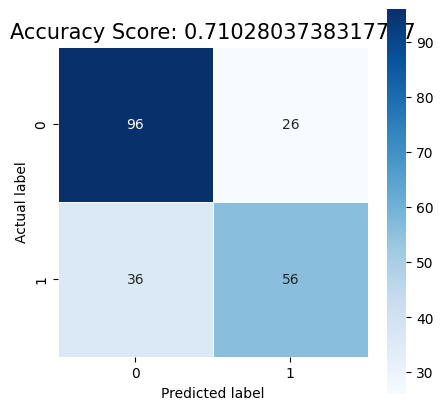

In [ ]:
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dt.score(X_test, Y_test))
plt.title(all_sample_title, size = 15)